In [1]:
import pandas as pd

from apsimNGpy.core.base_data import load_default_simulations
from apsimNGpy.core.core import APSIMNG
_apsim = load_default_simulations(crop = 'Maize', simulations_object=False)
apsim = APSIMNG(_apsim)
# create experiment initiate the experiment
apsim.create_experiment(permutation=True, verbose=False)# by default it is a permutation experiment

In [2]:
apsim.add_factor(specification="[Fertilise at sowing].Script.Amount = 0 to 200 step 20", factor_name='Nitrogen')
# use categories
apsim.add_factor(specification="[Sow using a variable rule].Script.Population =4, 10, 2, 7, 6", factor_name='Population')


In [3]:
apsim.run(report_name='Report') 

In [4]:
apsim.results

,SimulationName,SimulationID,CheckpointID,CheckpointName,Clock.Today,Experiment,Maize.AboveGround.N,Maize.AboveGround.Wt,Maize.Grain.N,Maize.Grain.NumberFunction,Maize.Grain.Size,Maize.Grain.Total.Wt,Maize.Grain.Wt,Maize.Phenology.CurrentStageName,Maize.Total.Wt,Nitrogen,Population,Yield,Zone
0,ExperimentNitrogen0Population10,6,1,Current,1991-05-28,Experiment,7.557,1061.484,5.157,3550.151,0.124,438.523,438.523,HarvestRipe,1149.863,0,10,4385.230,Field
1,ExperimentNitrogen0Population10,6,1,Current,1992-04-09,Experiment,0.379,60.550,0.000,0.000,0.000,0.000,0.000,HarvestRipe,63.317,0,10,0.000,Field
2,ExperimentNitrogen0Population10,6,1,Current,1993-03-16,Experiment,1.593,253.212,0.985,723.778,0.134,96.647,96.647,HarvestRipe,279.508,0,10,966.473,Field
3,ExperimentNitrogen0Population10,6,1,Current,1994-03-15,Experiment,1.097,148.141,0.856,403.927,0.205,82.705,82.705,HarvestRipe,151.993,0,10,827.046,Field
4,ExperimentNitrogen0Population10,6,1,Current,1995-04-04,Experiment,4.910,785.159,3.030,3012.005,0.098,296.098,296.098,HarvestRipe,869.135,0,10,2960.977,Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,ExperimentNitrogen80Population7,38,1,Current,1996-03-15,Experiment,9.992,1468.670,7.573,2946.067,0.229,675.998,675.998,HarvestRipe,1584.517,80,7,6759.983,Field
546,ExperimentNitrogen80Population7,38,1,Current,1997-04-05,Experiment,9.238,1044.060,4.269,1071.898,0.299,320.900,320.900,HarvestRipe,1197.160,80,7,3209.000,Field
547,ExperimentNitrogen80Population7,38,1,Current,1998-03-06,Experiment,8.679,954.843,4.751,1183.166,0.295,348.799,348.799,HarvestRipe,1081.517,80,7,3487.991,Field
548,ExperimentNitrogen80Population7,38,1,Current,1999-04-10,Experiment,15.714,1925.043,11.380,3044.566,0.291,885.937,885.937,HarvestRipe,2085.058,80,7,8859.370,Field


In [5]:
apsim.results.groupby('Nitrogen')['Yield'].mean()

Nitrogen
0      1896.38286
20     2578.28372
40     3216.36108
60     3796.97866
80     4381.29846
100    4845.38518
120    5084.91880
140    5084.01016
160    5063.75988
180    5044.90456
200    5031.23836
Name: Yield, dtype: float64

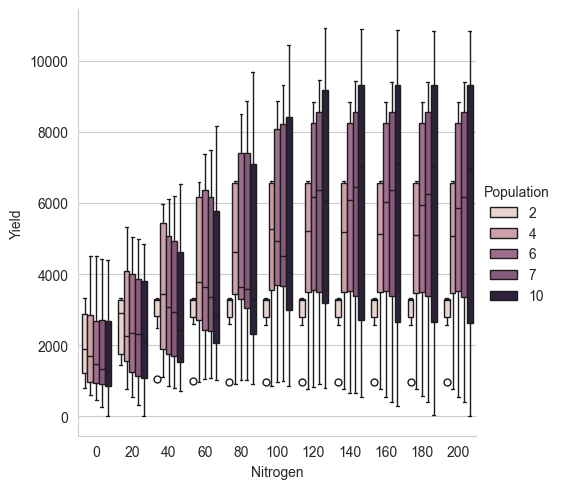

In [6]:
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import pyplot as plt
df= apsim.results 
df[['population' ]] = pd.Categorical(['Population'])
sns.catplot(x='Nitrogen', y='Yield', hue='Population', data=df, kind='box', )
plt.show()

In [8]:
#first add a crop replacement at the top of Models.Core.Simulations
apsim = APSIMNG(_apsim)
from apsimNGpy.core.base_data import load_default_simulations
from apsimNGpy.core.core import APSIMNG

_apsim = load_default_simulations(crop='Maize', simulations_object=False)
apsimC = APSIMNG(_apsim)
# create experiment initiate the experiment
apsimC.create_experiment(permutation=True, verbose=False)  # by default it is a permutation experiment
apsimC.add_factor(specification="[Fertilise at sowing].Script.Amount = 0 to 200 step 20", factor_name='Nitrogen')
# use categories
apsimC.add_factor(specification="[Sow using a variable rule].Script.Population =4, 10, 2, 7, 6",
                 factor_name='Population')

apsimC.add_crop_replacements(_crop ='Maize')
# add facto and name rue 
apsimC.add_factor(specification='[Maize].Leaf.Photosynthesis.RUE.FixedValue =1.0, 1.23, 4.3', factor_name='RUE')
apsimC.run()

In [9]:
apsimC.results

,SimulationName,SimulationID,CheckpointID,CheckpointName,Clock.Today,Experiment,Maize.AboveGround.N,Maize.AboveGround.Wt,Maize.Grain.N,Maize.Grain.NumberFunction,Maize.Grain.Size,Maize.Grain.Total.Wt,Maize.Grain.Wt,Maize.Phenology.CurrentStageName,Maize.Total.Wt,Nitrogen,Population,RUE,Yield,Zone
0,ExperimentNitrogen0Population10RUE1.0,16,1,Current,1991-05-28,Experiment,3.701,383.712,1.773,458.720,0.301,137.914,137.914,HarvestRipe,390.937,0,10,1.0,1379.137,Field
1,ExperimentNitrogen0Population10RUE1.0,16,1,Current,1992-04-09,Experiment,2.729,357.387,1.415,365.676,0.297,108.434,108.434,HarvestRipe,373.834,0,10,1.0,1084.340,Field
2,ExperimentNitrogen0Population10RUE1.0,16,1,Current,1993-03-16,Experiment,0.282,45.362,0.000,0.000,0.000,0.000,0.000,HarvestRipe,48.373,0,10,1.0,0.000,Field
3,ExperimentNitrogen0Population10RUE1.0,16,1,Current,1994-03-15,Experiment,1.949,236.156,1.044,265.349,0.301,79.768,79.768,HarvestRipe,243.447,0,10,1.0,797.680,Field
4,ExperimentNitrogen0Population10RUE1.0,16,1,Current,1995-04-04,Experiment,6.324,726.875,4.719,1319.477,0.279,368.221,368.221,HarvestRipe,755.549,0,10,1.0,3682.210,Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,ExperimentNitrogen80Population7RUE4.3,147,1,Current,1996-03-15,Experiment,7.197,1234.565,4.677,3850.000,0.118,453.877,453.877,HarvestRipe,1380.571,80,7,4.3,4538.774,Field
1646,ExperimentNitrogen80Population7RUE4.3,147,1,Current,1997-04-05,Experiment,12.683,1433.778,9.150,3579.562,0.211,754.999,754.999,HarvestRipe,1667.680,80,7,4.3,7549.985,Field
1647,ExperimentNitrogen80Population7RUE4.3,147,1,Current,1998-03-06,Experiment,8.379,962.586,5.773,2694.691,0.168,453.501,453.501,HarvestRipe,1142.701,80,7,4.3,4535.009,Field
1648,ExperimentNitrogen80Population7RUE4.3,147,1,Current,1999-04-10,Experiment,15.094,2088.942,10.696,3850.000,0.229,879.841,879.841,HarvestRipe,2358.605,80,7,4.3,8798.415,Field
